In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import json
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
tickers = ['TSLA']
nombres =['tesla']

In [3]:
j = 0
r = requests.get('https://www.macrotrends.net/stocks/charts/TSLA/tesla/balance-sheet')
p = re.compile(r' var originalData = (.*?);\r\n\r\n\r',re.DOTALL)
data = json.loads(p.findall(r.text)[0])
headers = list(data[0].keys())
headers.remove('popup_icon')
result = []
for row in data:
    soup = bs(row['field_name'])
    field_name = soup.select_one('a, span').text
    fields = list(row.values())[2:]
    fields.insert(0, field_name)
    result.append(fields)
pd.option_context('display.max_rows', None, 'display.max_columns', None)
df = pd.DataFrame(result, columns = headers)
df.to_excel(nombres[j]+"_FC.xlsx")
df


,field_name,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,2012-12-31,2011-12-31,2010-12-31,2009-12-31,2008-12-31
0,Cash On Hand,19384.00000,6268.00000,3879.00000,3523.23700,3498.73500,1219.53600,1923.66000,848.90100,220.98400,303.80300,173.15500,69.62700,
1,Receivables,1886.00000,1324.00000,949.00000,515.38100,499.14200,168.96500,226.60400,49.10900,26.84200,9.53900,6.71000,3.48800,
2,Inventory,4101.00000,3552.00000,3113.00000,2263.53700,2067.45400,1277.83800,953.67500,340.35500,268.50400,50.08200,45.18200,23.22200,
3,Pre-Paid Expenses,1346.00000,959.00000,366.00000,268.36500,194.46500,115.66700,76.13400,27.57400,8.43800,9.41400,10.83900,4.22200,
4,Other Current Assets,,,,,,,,,,,,,
5,Total Current Assets,26717.00000,12103.00000,8307.00000,6570.52000,6259.79600,2782.00600,3180.07300,1265.93900,524.76800,372.83800,235.88600,100.55900,
6,"Property, Plant, And Equipment",12747.00000,10396.00000,11330.00000,10027.52000,5982.95700,3403.33400,1829.26700,738.49400,552.22900,298.41400,114.63600,23.53500,
7,Long-Term Investments,,,,,,,,,,,,,
8,Goodwill And Intangible Assets,520.00000,537.00000,350.00000,421.73900,376.14500,12.81600,,,,,,,0.00000
9,Other Long-Term Assets,7515.00000,7608.00000,7241.00000,7062.33500,6404.79600,78.38000,54.58300,30.07200,27.12200,30.43900,27.59700,6.33000,


In [4]:
df = df.rename(columns={'2020-12-31': '2020','2019-12-31': '2019','2018-12-31': '2018','2017-12-31': '2017','2016-12-31': '2016','2015-12-31': '2015','2014-12-31': '2014','2013-12-31': '2013','2012-12-31': '2012','2011-12-31': '2011','2010-12-31': '2010','2009-12-31': '2009','2008-12-31': '2008'})


In [5]:
df = df.drop(['2008', '2009'], axis=1)
df = df.round(2)
cols = df.columns.drop('field_name')
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [6]:
#liquidez
liquidity = np.array(df[cols].iloc[5]/df[cols].iloc[12])
acid_test = np.array((df[cols].iloc[5]-df[cols].iloc[2])/df[cols].iloc[12])
cash_ratio = np.array((df[cols].iloc[0] + df[cols].iloc[3])/df[cols].iloc[12])

#debt
debt_ratio = np.array((df[cols].iloc[16] /df[cols].iloc[5]))
debt_equity = np.array((df[cols].iloc[16]/df[cols].iloc[22]))
equity_multiplier = np.array((df[cols].iloc[11]/df[cols].iloc[21]))

In [7]:
ratios = pd.DataFrame({'Liquidity' : liquidity, 'Acid Test': acid_test, 'Cash Ratio': cash_ratio, 'Debt Ratio' : debt_ratio, 'Debt Equity':debt_equity, 'Equity Multiplier': equity_multiplier})
ratios

,Liquidity,Acid Test,Cash Ratio,Debt Ratio,Debt Equity,Equity Multiplier
0,1.875140,1.587310,1.454941,1.088184,0.557509,2.259935
1,1.134621,0.801631,0.677510,2.217797,0.782360,4.594750
2,0.831282,0.519764,0.424797,2.887083,0.806422,5.165885
3,0.856131,0.561195,0.494041,3.564525,0.817326,5.474236
4,1.074273,0.719468,0.633808,2.735870,0.755645,4.092403
5,0.989673,0.535094,0.474986,2.510503,0.865678,7.444781
6,1.509171,1.056584,0.949044,1.546806,0.843635,6.395309
7,1.875021,1.370911,1.298174,1.382223,0.723980,3.622931
8,0.973401,0.475348,0.425559,1.885576,0.888080,8.934964
9,1.948573,1.686828,1.636974,1.312642,0.685969,3.184396


In [8]:
ratios1 = ratios.T
ratios1.columns = [2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010]
ratios1

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
Liquidity,1.875140,1.134621,0.831282,0.856131,1.074273,0.989673,1.509171,1.875021,0.973401,1.948573,2.756805
Acid Test,1.587310,0.801631,0.519764,0.561195,0.719468,0.535094,1.056584,1.370911,0.475348,1.686828,2.228762
Cash Ratio,1.454941,0.677510,0.424797,0.494041,0.633808,0.474986,0.949044,1.298174,0.425559,1.636974,2.150342
Debt Ratio,1.088184,2.217797,2.887083,3.564525,2.735870,2.510503,1.546806,1.382223,1.885576,1.312642,0.758985
Debt Equity,0.557509,0.782360,0.806422,0.817326,0.755645,0.865678,0.843635,0.723980,0.888080,0.685969,0.463720
Equity Multiplier,2.259935,4.594750,5.165885,5.474236,4.092403,7.444781,6.395309,3.622931,8.934964,3.184396,1.864698


<AxesSubplot:>

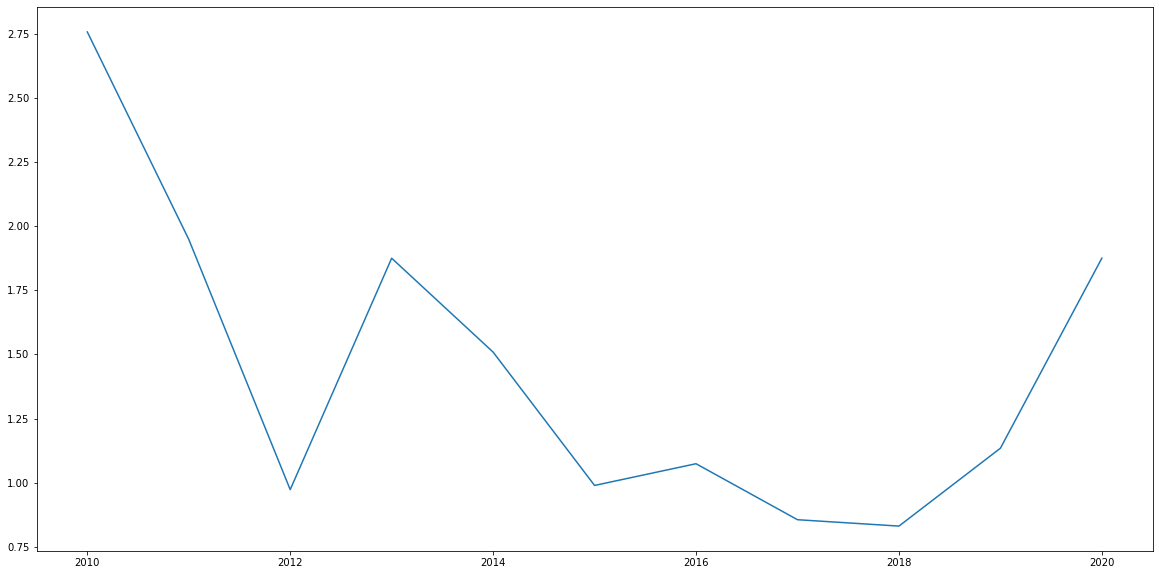

In [9]:
ratios1.iloc[0].plot(figsize = (20,10))


In [10]:
j = 0
r = requests.get('https://www.macrotrends.net/stocks/charts/TSLA/tesla/income-statement')
p = re.compile(r' var originalData = (.*?);\r\n\r\n\r',re.DOTALL)
data = json.loads(p.findall(r.text)[0])
headers = list(data[0].keys())
headers.remove('popup_icon')
result = []
for row in data:
    soup = bs(row['field_name'])
    field_name = soup.select_one('a, span').text
    fields = list(row.values())[2:]
    fields.insert(0, field_name)
    result.append(fields)
pd.option_context('display.max_rows', None, 'display.max_columns', None)
df_EERR = pd.DataFrame(result, columns = headers)

In [11]:
df_EERR

,field_name,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,2012-12-31,2011-12-31,2010-12-31,2009-12-31,2008-12-31
0,Revenue,31536.00000,24578.00000,21461.00000,11759.00000,7000.13200,4046.02500,3198.35600,2013.49600,413.25600,204.24200,116.74400,111.94300,14.74200
1,Cost Of Goods Sold,24906.00000,20509.00000,17419.00000,9536.00000,5400.87500,3122.52200,2316.68500,1557.23400,383.18900,142.64700,86.01300,102.40800,15.88300
2,Gross Profit,6630.00000,4069.00000,4042.00000,2223.00000,1599.25700,923.50270,881.67110,456.26200,30.06700,61.59500,30.73100,9.53500,-1.14100
3,Research And Development Expenses,1491.00000,1343.00000,1460.00000,1378.00000,834.40800,717.90000,464.70000,231.97600,273.97800,208.98100,92.99600,19.28200,53.71400
4,SG&A Expenses,3145.00000,2646.00000,2835.00000,2477.00000,1432.18900,922.23200,603.66000,285.56900,150.37200,104.10200,84.57300,42.15000,23.64900
5,Other Operating Income Or Expenses,,,,,,,,,,,,,
6,Operating Expenses,29542.00000,24647.00000,21849.00000,13391.00000,7667.47200,4762.65400,3385.04500,2074.77900,807.53900,455.73000,263.58200,163.84000,93.24600
7,Operating Income,1994.00000,-69.00000,-388.00000,-1632.00000,-667.34030,-716.62940,-186.68870,-61.28310,-394.28300,-251.48800,-146.83800,-51.89700,-78.50400
8,Total Non-Operating Income/Expense,-840.00000,-596.00000,-617.00000,-577.00000,-79.00800,-158.99500,-97.94700,-10.14300,-1.79400,-2.43400,-7.31700,-3.81700,-4.18100
9,Pre-Tax Income,1154.00000,-665.00000,-1005.00000,-2209.00000,-746.34800,-875.62400,-284.63600,-71.42600,-396.07700,-253.92200,-154.15500,-55.71400,-82.68500


In [12]:
df_EERR

df_EERR = df_EERR.rename(columns={'2020-12-31': '2020','2019-12-31': '2019','2018-12-31': '2018','2017-12-31': '2017','2016-12-31': '2016','2015-12-31': '2015','2014-12-31': '2014','2013-12-31': '2013','2012-12-31': '2012','2011-12-31': '2011','2010-12-31': '2010','2009-12-31': '2009','2008-12-31': '2008'})
df_EERR = df_EERR.round(2)
df_EERR = df_EERR.drop(['2008', '2009'], axis=1)
cols = df_EERR.columns.drop('field_name')
df_EERR[cols] = df_EERR[cols].apply(pd.to_numeric, errors='coerce')

In [13]:
#profit ratios

profit_margin = np.array((df_EERR[cols].loc[0]-df_EERR[cols].loc[1])/df_EERR[cols].loc[0])
ROA = np.array(df_EERR[cols].loc[15]/df[cols].loc[11])
ROE = np.array(df_EERR[cols].loc[15]/df[cols].loc[22])

#Activity ratios
Inventory_turnover = np.array((df_EERR[cols].loc[1]/df[cols].loc[2]))
Inventory_turnover_days = np.array((Inventory_turnover/365))
receivable_turnover = np.array((df_EERR[cols].loc[0]/df[cols].loc[1]))

Inventory_turnover

#Du Pont

NPM = np.array((df_EERR[cols].loc[15]/df_EERR[cols].loc[0]))
Assets_Turnover = np.array(df_EERR[cols].loc[0]/df[cols].loc[11])
CM = np.array(df_EERR[cols].loc[11]/df[cols].loc[21])
ROE_DP = NPM * Assets_Turnover * CM

In [14]:
ratios2 = pd.DataFrame({'Profit Margin' : liquidity, 'ROA': acid_test, 'ROE': cash_ratio, 'Inv. Turnover' : Inventory_turnover, 'Inv. Turnover days':Inventory_turnover_days, 'Receivable Turnover': receivable_turnover, 'NPM': NPM, 'Assets Turnover':Assets_Turnover, 'CM':CM, 'ROE DuPont':ROE_DP})
ratios2 = ratios2.T
ratios2.columns = [2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010]
ratios1 = ratios1.append(ratios2)
ratios1 = ratios1.round(2)
ratios1

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
Liquidity,1.88,1.13,0.83,0.86,1.07,0.99,1.51,1.88,0.97,1.95,2.76
Acid Test,1.59,0.80,0.52,0.56,0.72,0.54,1.06,1.37,0.48,1.69,2.23
Cash Ratio,1.45,0.68,0.42,0.49,0.63,0.47,0.95,1.30,0.43,1.64,2.15
Debt Ratio,1.09,2.22,2.89,3.56,2.74,2.51,1.55,1.38,1.89,1.31,0.76
Debt Equity,0.56,0.78,0.81,0.82,0.76,0.87,0.84,0.72,0.89,0.69,0.46
Equity Multiplier,2.26,4.59,5.17,5.47,4.09,7.44,6.40,3.62,8.93,3.18,1.86
Profit Margin,1.88,1.13,0.83,0.86,1.07,0.99,1.51,1.88,0.97,1.95,2.76
ROA,1.59,0.80,0.52,0.56,0.72,0.54,1.06,1.37,0.48,1.69,2.23
ROE,1.45,0.68,0.42,0.49,0.63,0.47,0.95,1.30,0.43,1.64,2.15
Inv. Turnover,6.07,5.77,5.60,4.21,2.61,2.44,2.43,4.58,1.43,2.85,1.90
